<a href="https://colab.research.google.com/github/taeilkeemm/fordatastudy/blob/main/DMML_HW3_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
col = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14']
df = pd.read_csv('HWtrain.data.txt', names=col, header = None)

In [3]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14
0,1,2.94,2.62,1.77,13.39,1.45,3.22,16.1,1195,93,0.34,2.85,0.92,4.80
1,3,0.75,2.48,3.91,13.40,1.41,1.56,23.0,750,102,0.43,1.80,0.70,7.30
2,1,2.68,2.12,3.84,13.41,1.48,3.00,18.8,1035,90,0.27,2.45,0.91,4.28
3,1,3.00,2.10,1.77,13.05,2.03,3.35,17.0,885,107,0.28,3.00,0.88,5.04
4,3,0.70,2.48,2.51,14.16,1.24,1.71,20.0,660,91,0.44,1.68,0.62,9.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2,2.27,2.20,1.52,12.47,3.28,2.63,19.0,937,162,0.32,2.50,1.16,2.60
169,3,1.09,2.40,2.31,12.81,0.83,1.36,24.0,560,98,0.27,1.15,0.66,5.70
170,2,2.29,2.50,1.39,12.08,1.04,3.19,22.5,385,84,0.43,2.56,0.93,2.90
171,1,3.56,2.59,1.89,13.88,1.70,3.56,15.0,1095,101,0.17,3.25,0.88,5.43


In [4]:
from sklearn.preprocessing import StandardScaler
x = df.values

In [5]:
x = StandardScaler().fit_transform(x) # normalizing the features
stdscalar = StandardScaler()
stdscalar.fit(x)
x = stdscalar.transform(x)

In [6]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_WineInput = pd.DataFrame(x,columns=feat_cols)

In [7]:
normalised_WineInput

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13
0,-1.232304,0.930130,0.920000,-0.522737,0.480614,-0.246399,0.858552,-1.019149,1.452810,-0.476415,-0.171779,0.905127,-0.154416,-0.119798
1,1.351801,-1.264542,0.410688,1.383752,0.492901,-0.315711,-1.465721,1.037933,0.022591,0.161948,0.556993,-0.785529,-1.113785,0.954483
2,-1.232304,0.669576,-0.898972,1.321390,0.505188,-0.194415,0.550516,-0.214204,0.938574,-0.689202,-0.738601,0.261067,-0.198024,-0.343248
3,-1.232304,0.990258,-0.971731,-0.522737,0.062855,0.758627,1.040573,-0.750834,0.456477,0.516594,-0.657626,1.146649,-0.328847,-0.016667
4,1.351801,-1.314648,0.410688,0.136516,1.426713,-0.610287,-1.255697,0.143549,-0.266667,-0.618273,0.637968,-0.978747,-1.462646,1.985792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.059748,0.258701,-0.607936,-0.745458,-0.649791,2.924632,0.032455,-0.154578,0.623604,4.417701,-0.333728,0.341575,0.892167,-1.065165
169,1.351801,-0.923816,0.119653,-0.041660,-0.232033,-1.320737,-1.745754,1.336061,-0.588065,-0.121769,-0.738601,-1.832126,-1.288215,0.266943
170,0.059748,0.278744,0.483447,-0.861272,-1.128984,-0.956848,0.816547,0.888869,-1.150510,-1.114778,0.556993,0.438184,-0.110809,-0.936251
171,-1.232304,1.551453,0.810862,-0.415831,1.082677,0.186802,1.334608,-1.347090,1.131412,0.091019,-1.548347,1.549187,-0.328847,0.150921


In [8]:
from sklearn.decomposition import PCA
pca_wine = PCA(n_components=2)

In [9]:
pca_wine.fit(x)
principalComponents_Wine = pca_wine.transform(x)

principal_wine_Df = pd.DataFrame(data = principalComponents_Wine, columns = ['principal component 1', 'principal component 2'])

print(principal_wine_Df.head(n=4))
print(pca_wine.explained_variance_ratio_)

   principal component 1  principal component 2
0               2.151687              -0.720906
1              -2.919613              -1.693473
2               1.144991              -0.199905
3               2.426726               0.020767
[0.39572977 0.17712195]


In [20]:
#print( np.unique (WineDataQuality) )

#stdscalar2.transform(WineInput.values[0:1])

#print( pca_wine.fit_transform(x,stdscalar2.transform(df.values[0:1]) ) )
#WineDataQuality[WineDataQuality == 1]
#print(stdscalar2.transform(df.values[0:1]))
#print( pca_wine.transform( stdscalar.transform(df.values[0:2]) )) 
#print(principalComponents_Wine)
print(principalComponents_Wine[0:13,0])
#print( principalComponents_Wine.shape )

[ 2.15168721 -2.91961264  1.14499088  2.42672607 -2.80719244 -3.24267215
  3.34630597  2.80304384  2.07212042 -0.98293166 -0.22518356 -4.41859336
  2.94848964]


In [23]:
WineDataQuality = df[0:df.shape[0]][0:1]
WineDataQuality = df[0:][0:1]
WineDataQuality = df['feature1']

<Figure size 432x288 with 0 Axes>

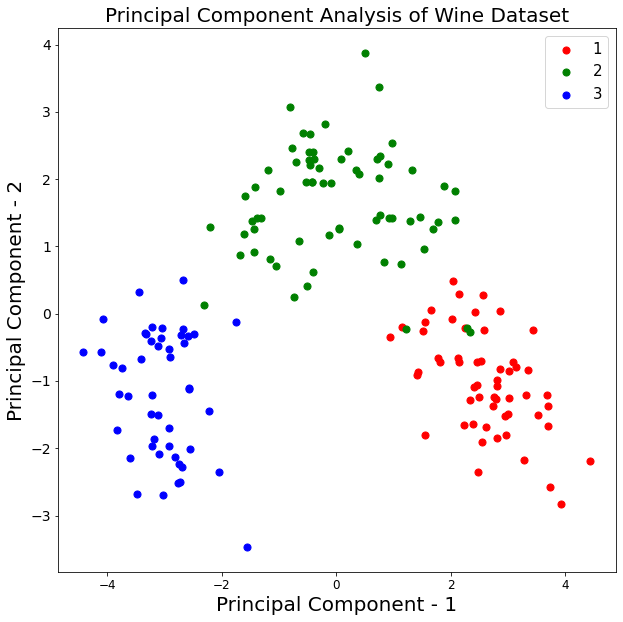

In [24]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset",fontsize=20)
targets = list(np.unique (WineDataQuality))
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = (WineDataQuality == target)
    plt.scatter(principal_wine_Df.loc[indicesToKeep, 'principal component 1']
               , principal_wine_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [25]:
col = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14']
df2 = pd.read_csv('HWtest.data.txt', names=col, header = None)

In [31]:
df2

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14
0,X,3.67,2.50,1.43,13.72,2.04,2.87,16.7,1285,108,0.19,3.40,0.89,6.80
1,X,2.64,2.10,1.50,13.07,1.37,2.69,15.5,1020,98,0.28,2.40,1.18,3.70
2,X,2.65,2.17,2.16,12.07,1.35,3.28,21.0,378,85,0.37,2.60,0.86,2.76
3,X,1.46,2.26,1.53,12.69,1.62,2.06,20.7,495,80,0.58,1.38,0.96,3.05
4,X,2.74,2.70,1.53,13.76,1.35,3.00,19.5,1235,132,0.50,2.95,1.25,5.40


In [32]:
WineDataQuality_test = df2[0:df.shape[0]][0:1]
WineDataQuality_test = df2[0:][0:1]
WineDataQuality_test = df2['feature1']

In [33]:
x_test = df2.values
x_test = StandardScaler().fit_transform(x) # normalizing the features
stdscalar = StandardScaler()
stdscalar.fit(x_test)
x_test = stdscalar.transform(x_test)

In [34]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_WineInput_test = pd.DataFrame(x,columns=feat_cols)

In [35]:
pca_wine_test = PCA(n_components=2)
pca_wine_test.fit(x_test)
principalComponents_Wine_test = pca_wine.transform(x_test)

principal_wine_Df_test = pd.DataFrame(data = principalComponents_Wine_test, columns = ['principal component 1', 'principal component 2'])

print(principal_wine_Df_test.head(n=4))
print(pca_wine_test.explained_variance_ratio_)

   principal component 1  principal component 2
0               2.151687              -0.720906
1              -2.919613              -1.693473
2               1.144991              -0.199905
3               2.426726               0.020767
[0.39572977 0.17712195]


KeyError: ignored

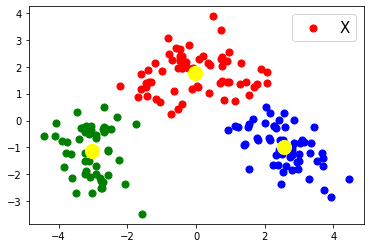

In [37]:
kmeans = KMeans(n_clusters=3).fit(principal_wine_Df)
groups = np.unique ( kmeans.labels_)
for group, color in zip(groups, colors):
    indicesToKeep = (kmeans.labels_ == group)
    plt.scatter(principal_wine_Df.loc[indicesToKeep, 'principal component 1']
               , principal_wine_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')

for i, l in enumerate(kmeans.labels_):
  plt.plot(principal_wine_Df[i], principal_wine_Df[i], color=colors[l], marker=markers[l])

IndexingError: ignored

<Figure size 432x288 with 0 Axes>

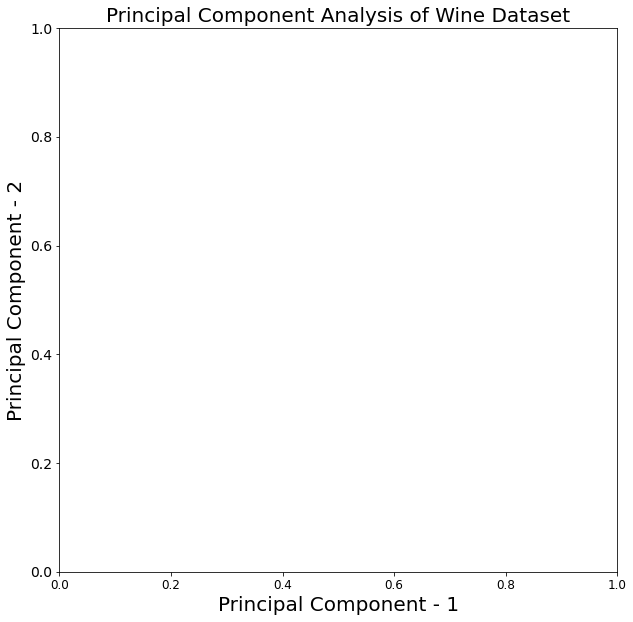

In [36]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset",fontsize=20)
targets = list(np.unique (WineDataQuality_test))
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = (WineDataQuality_test == target)
    plt.scatter(principal_wine_Df_test.loc[indicesToKeep, 'principal component 1']
               , principal_wine_Df_test.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})